# CHEPTER 4 신경망 학습
---
- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것.
- 손실 함수: 신경망이 학습할 수 있도록 해주는 지표  
    -> 손실함수의 결괏값을 가장 작게 만들어야 함.
- 경사법: 함수의 기울기를 활용하여 손실 함수의 값을 가급적 작게 만드는 것.

## 4.1 데이터에서 학습한다!

- 신경망은 데이터를 보고 학습할 수 있다는 특징을 갖는다.  
    즉, 가중치 매개변수의 값이 데이터를 보고 자동으로 결정이 된다.

### 4.1.1 데이터 주도 학습

- 기계학습: 데이터에서 답을 찾고 패턴을 발견하고 이야기를 만드는 것. 데이터 매우 중요!!  
    -> 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있었음.

- 문제를 해결하는 방법  
    -> 기존 프로그램: 문제 - 사람이 생각한 알고리즘 - 결과  
    -> 기계 학습: 문제 - 사람이 생각한 특징(SIFT, HOG 등) - 기계학습(SVM, KNN 등) - 결과  
    -> 신경망(딥러닝): 문제 - 신경망(딥러닝) - 결과

- 기계 학습은 '사람'이 적절한 특징을 생각해 내고 모아진 데이터로부터 기계학습을 통해 규칙을 찾아내야 했음.
- 신경망은 이미지를 '있는 그대로' 학습. 사람이 생각했던 특징들까지 '기계' 스스로 학습 (=> 종단간 기계학습(end-to-end machine learning)이라고도 함.)

### 4.1.2 훈련 데이터와 시험 데이터

- 기계 데이터를 취급할 때 주의할 점  
범용 능력(아직 보지 못한 데이터로 문제를 올바르게 풀어내는 능력)을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리한다.
    - 훈련 데이터: 최적의 매개변수를 찾기 위한 데이터
    - 시험 데이터: 앞서 훈련한 모델의 실력을 평가하기 위한 데이터  
(오버피팅: 한 데이터셋에만 지나치게 최적화된 상태)


## 4.2 손실 함수

- 신경망에서는 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색하는데, 신경망 학습에서 사용하는 지표를 손실함수라고 한다.  
    손실함수는 일반적으로 오차제곱합과 교차 엔트로피 오차를 사용.  

### 4.2.1 오차제곱합

- 원-핫 인코딩: 한 원소만 1로 하고 그 외에는 0으로 나타내는 표기법

In [1]:
# 오차제곱합

import numpy as np

def sum_squares_error(y, t):    # y, t는 넘파이 배열
    return 0.5 * np.sum((y - t)**2)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 '2'

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    # 2일 확률이 가장 높다고 추정

print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]    # 7일 확률이 가장 높다고 추정

print(sum_squares_error(np.array(y), np.array(t)))

# 첫 번째 예의 추정 결과가 호차가 더 작으므로 정답에 더 가까울 것임.

0.09750000000000003
0.5975


### 4.2.2 교차 엔트로피 오차

- 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정한다.

In [3]:
# 교차 엔트로피 오차

import numpy as np

def coross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y +delta))

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
coross_entropy_error(np.array(y), np.array(t))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
coross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

- 미니배치: 훈련 데이터로부터 일부만 골라 학습을 수행하는 것
- 미니배치 학습: 많은 데이터 중 일부만을 가지고 학습하는 학습 방법



In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from

### 4.2.5 왜 손실 함수를 설정하는가?

신경망 학습에서는 최적의 배개변수(가중치와편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.  
이때 매개변수의 미분(기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정 반복.  

- 지표로 정확도를 사용하게 되면 매개변수의 미분이 대부분의 장소에서 0이 되므로 사용하지 않는다.( 연속이 아니라 불연속적인 값을 가지므로)  
    이는 활성화 함수로 계단 함수를 사용하지 않는 이유와도 들어맞는다.
    
## 4.3 수치 미분

- 경사법: 기울기(경사) 값을 기준으로 나아갈 방향 정함.

### 4.3.1 미분

- 미분: '특정 순간'의 변화량

In [2]:
# 미분

# 나쁜 예

def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

- h에 가급적 작은 값을 대입하기 위해 1e-50(0.00...1 형태에서 소수점 아래 0이 50개)이라는 작은 값을 사용.
    이것은 반올림 오차 문제를 일으킴.

- 반올림 오차: 작은값(소수점 8자리 이하)가 생략되어 최종 결과 계산에 오차 발생

> 개선점 1:
- h에 10의 -4제곱 사용.

> 개선점 2:
- 함수 f의 차분과 관련한 것
    h를 무한히 0으로 좁히는 것은 불가능하므로 x위치에서의 접선이 아닌 x+h와 x 사이의 기울기를 이용(근사 값 이용: 수치미분)  
    수치 미분은 근사 값을 이용하기에 오차가 포함되므로, 이를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법 이용  
    (이는 x를 중심으로 그 전후의 차분을 계산한다는 의미로 중심 차분 혹은 중앙 차분이라고 불린다.)  
    (x+h와 x의 차분은 전방 차분)    

In [1]:
# 개선점을 이용해 미분 구현

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

In [2]:
# y = 0.01x^2 + 0.1x 함수

def function_1(x):
    return 0.01*x**2 + 0.1*x

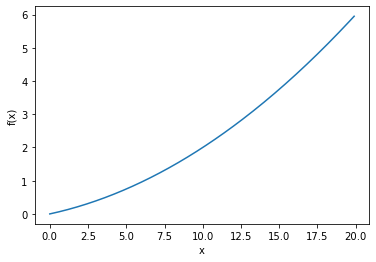

0.1999999999990898
0.2999999999986347


In [5]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5))   # x=5 일 때 함수의 미분
print(numerical_diff(function_1, 10))  # x=10일 때 함수의 미분

### 4.3.3 편미분

- 변수가 여럿인 함수에 대한 미분
- 편미분에서는 '어느 변수에 대한 미분인지'를 구별해야 함.

In [7]:
# 변수가 두개인 f(x0, x1) = x0^2 + x1^2 함수

def function_2(x):
    return x[0]**2 +x[1]**2  # =np.sum(x**2)

In [9]:
# x0 = 3, x1 = 4일 대, x0에 대한 편미분

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [12]:
# x0 = 3, x1 = 4 일때 x1에 대한 편미분

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


## 4.4 기울기

- 모든 편미분을 벡터로 정리한 것

In [26]:
# 기울기 구현

def numerical_gradient(f, x):  # f는 함수, x는 넘파이 배열
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 오두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [27]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


- 기울가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

### 4.4.1 경사법(경사 하강법)

- 학습 시에 최적의 매개변수(가중치와 편향)을 찾아야함.  
    (최적: 손실 함수가 최솟값이 될 때의 매개변수 값.)
- 경사법: 기울기를 잘 이용해 함수의 최솟값(또는 가능한 작은 값)을 찾아내는 것  
    그러나 기울기로 지표로 삼았을 때 기울기가 가리키는 방향이 정말 최솟값인지 주의해야 하며,  
    실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.  
    (암수의 극솟값, 최솟값, 안정점 모두의 기울기가 0이기에 발생. 복잡하고 찌그러진 모양의 함수에서는 평평한 곳으로 파고들며 고원이라는 정체기에 빠질 수도 있음.)
    
- 경사법에서 최솟값을 찾는 것을 '경사 하강법', 최댓값을 찾는 것을 '경사 상승법'이라 한다.  
    부호를 반전시키면 같은 문제이므로 본질적으로 다르지는 않지만 신경망 분야에서는 일반적으로 경사 하강법 사용.
    
- 학습률: 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것.  
    변수가 여러개일 시에도 각 변수의 편미분 값을 이용하여 같은 식으로 갱신한다.  
    학습률의 값은 0.01이나 0.001과 같이 미리 정해두어야 하며,  
    그 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없으므로 학습률을 변경해가며 올바르게 학습하는지 확인한다.

In [22]:
# 경사 하강법

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# f: 최적화하려는 함수, init_x: 초깃값, lr: learning rate(학습률), step_num: 경사법에 따른 반복 횟수
# numerical_graient(f, x): 함수의 기울기 구하는 함수> 구해진 기울기에 학습률의 곱으로 갱신하는 처리를 step_num번 반복

In [25]:
# 경사법으로 f(x0, x1) = x0^2 + x1^2의 최솟값 구하기

import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2
    
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

[-6.11110793e-10  8.14814391e-10]


In [29]:
# 학습률이 너무 큰 예

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))  # 너무 큰 값으로 발산.

# 학습률이 너무 작은 예

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))  # 거의 갱신되지 않은 채로 끝남.

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


- 하이퍼파라미터: 사람이 직접 설정해야 하는 매개변수

### 4.4.2 신경망에서의 기울기

- 가중치와 경사(기울기)의 형상은 같다.

## 4.5 학습 알고리즘 구현하기

> 전제  

신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이란 한다.  
> 학습 1단계: 미니배치  

훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표.  
> 학습 2단계: 기울기 산출  

미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시합니다.  
> 학습 3단계: 매개변수 갱신  

가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.  
> 학습 4단계: 반복  

1~3단계를 반복합니다.

- 경사하강법으로 매개변수를 갱신하는 방법이며, 이때, 데이터를 미니배치로 부작위로 선정하기 때문에 '확률적 경사 하강법'이라고 부름.
- 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 영어 머리글자를 따 'SDG'라는 함수로 기능 구현.


### 4.5.1 2층 신경망 클래스 구현하기
